# Q1 .

### import package

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy
from numpy import array
import numpy as np
from sklearn.linear_model import LinearRegression
from tkinter import _flatten
import pandas as pd
import statsmodels.api as sm
import math
import random

### a.

In [4]:
image_matrix = np.zeros((400, 2576))
gender = []
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        image_matrix[i+j*10] = image_array.flatten()
gender = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
gender = list(_flatten(gender))
print("image matrix:")
print(image_matrix)
print("size:",len(image_matrix),"x", len(image_matrix[0]))
print("")
print("gender list:")
print(gender)
print("size:",len(gender))

image matrix:
[[ 88.  88.  90. ... 138. 142. 134.]
 [ 87.  90.  95. ... 124. 120.  88.]
 [ 92.  92.  88. ... 165. 146. 151.]
 ...
 [122. 123. 124. ...  38.  40.  38.]
 [120. 119. 121. ...  95.  92.  90.]
 [124. 125. 125. ...  33.  34.  34.]]
size: 400 x 2576

gender list:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### b-1.

In [5]:
model = LinearRegression().fit(image_matrix,gender)

r_sq = model.score(image_matrix,gender)

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 1.0
intercept: 1.0371996802349768
slope: [ 5.36844607e-05  8.49097733e-05  8.43449481e-05 ... -4.90729523e-05
 -2.08496414e-04 -1.79191361e-04]


### b-2.

###### stepwise regression

In [6]:
X = pd.DataFrame(image_matrix)
y = pd.DataFrame(gender)
number = 50
print("finds",number,"important pixels")
def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):

    included = list(initial_list)
    for i in range(0,number):
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add pixels  {:10} with p-value {:.6}'.format(best_feature, best_pval))

        i = i+1
    return included

result = stepwise_selection(X, y)

print(number,'important pixels:')
print(result)

finds 50 important pixels


<ipython-input-6-786996785ef6>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add pixels        2221 with p-value 2.50433e-13
Add pixels        1469 with p-value 2.4715e-13
Add pixels        2115 with p-value 2.70356e-10
Add pixels        2114 with p-value 1.41941e-11
Add pixels        2113 with p-value 8.48284e-12
Add pixels        2112 with p-value 5.19048e-11
Add pixels        2111 with p-value 7.91399e-11
Add pixels        2110 with p-value 6.62313e-11
Add pixels        2109 with p-value 6.36857e-12
Add pixels        2108 with p-value 6.77874e-12
Add pixels        2107 with p-value 2.6131e-11
Add pixels        2106 with p-value 9.2616e-11
Add pixels        2105 with p-value 2.84733e-10
Add pixels        2104 with p-value 4.6633e-10
Add pixels        2103 with p-value 1.70221e-10
Add pixels        2102 with p-value 2.57839e-10
Add pixels        2101 with p-value 4.40242e-10
Add pixels        2100 with p-value 4.23698e-10
Add pixels        2099 with p-value 1.33177e-10
Add pixels        2098 with p-value 4.19105e-10
Add pixels        2097 with p-value 4.44131e

###### plot important pixels on image

50 important pixels at
( 48 , 13 )
( 31 , 43 )
( 45 , 45 )
( 45 , 44 )
( 45 , 43 )
( 45 , 42 )
( 45 , 41 )
( 45 , 40 )
( 45 , 39 )
( 45 , 38 )
( 45 , 37 )
( 45 , 36 )
( 45 , 35 )
( 45 , 34 )
( 45 , 33 )
( 45 , 32 )
( 45 , 31 )
( 45 , 30 )
( 45 , 29 )
( 45 , 28 )
( 45 , 27 )
( 45 , 26 )
( 45 , 25 )
( 45 , 24 )
( 45 , 23 )
( 45 , 22 )
( 45 , 21 )
( 45 , 20 )
( 45 , 19 )
( 45 , 18 )
( 45 , 17 )
( 45 , 16 )
( 45 , 15 )
( 45 , 14 )
( 45 , 13 )
( 45 , 12 )
( 45 , 11 )
( 45 , 10 )
( 45 , 9 )
( 45 , 8 )
( 45 , 7 )
( 45 , 6 )
( 45 , 5 )
( 45 , 4 )
( 45 , 3 )
( 45 , 2 )
( 42 , 2 )
( 44 , 44 )
( 44 , 43 )
( 44 , 42 )


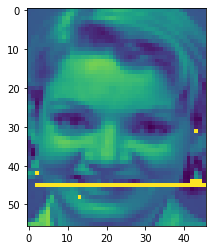

In [7]:
image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\1_1.png")
img_array = np.array(image)
print(number,"important pixels at")
for i in range(0, number): #math.floor()
    col = math.floor(result[i]/46)
    row = result[i]-46*col
    print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

### Q2

###### read file & rotate the coordinates

In [8]:
mountain_list = pd.read_csv("Volcano.csv").values.tolist()
mountain_list.reverse()
for i in range(0,60):
    mountain_list[i].reverse()

###### set walk 50 steps, searching range 20x20

In [9]:
X1_search_range = 20
X2_search_range = 20
epoch = 50
print("walk",epoch,"steps, searching range",X2_search_range,"x",X1_search_range)
Current_x1 = 0
Current_x2 = 0
best_location = []
best_height = 0
Move_to_seq = 0
x =[]
y=[]

def height(x1,x2):
    return mountain_list[x1][x2]

walk 50 steps, searching range 20 x 20


###### climbing

In [10]:
for i in range (0,epoch):
    print("the",i,"step")
    print("current at:","(",87-Current_x2,",",Current_x1+1,")")
    print("current height:",mountain_list[Current_x1][Current_x2])
    index = 0
    x.clear()
    y.clear()
    x=[[0]*2 for i in range(X1_search_range*X2_search_range)]
    y=[[0]*2 for i in range(X1_search_range*X2_search_range)]

    if Current_x1>=((X1_search_range-1)/2) and Current_x1>=((X2_search_range-1)/2):
        for i in range(0,X1_search_range):
            for j in range(0,X2_search_range):        
                x[index][0] = int((Current_x1+i)-((X1_search_range-1)/2))
                x[index][1] = int((Current_x2+j)-((X2_search_range-1)/2))
                index = index+1
    else:
        for i in range(0,X1_search_range):
            for j in range(0,X2_search_range):        
                x[index][0] = int(Current_x1+i)
                x[index][1] = int(Current_x2+j)
                index = index+1
    for i in range(0,X1_search_range*X2_search_range):
        y[i] = height(x[i][0],x[i][1])
        
    model = LinearRegression().fit(x,y)
    prediction = model.predict(x)
    index = np.argmax(prediction)

    l = len(prediction)
    index = np.argmax(prediction)
    NewPosition = x[index]
    print("move to","(",87-NewPosition[1],",",NewPosition[0]+1,")")
    print("")
    Current_x1 = NewPosition[0]
    Current_x2 = NewPosition[1]
    if best_height < height(Current_x1,Current_x2):
        best_location = [Current_x1,Current_x2]
        best_height = height(Current_x1,Current_x2)
print ("the best height is:",best_height)
print ("at location","(",87-best_location[1],",",best_location[0]+1,")",", after",epoch,"times search")

the 0 step
current at: ( 87 , 1 )
current height: 94
move to ( 68 , 20 )

the 1 step
current at: ( 68 , 20 )
current height: 115
move to ( 59 , 29 )

the 2 step
current at: ( 59 , 29 )
current height: 140
move to ( 50 , 38 )

the 3 step
current at: ( 50 , 38 )
current height: 170
move to ( 41 , 28 )

the 4 step
current at: ( 41 , 28 )
current height: 165
move to ( 32 , 37 )

the 5 step
current at: ( 32 , 37 )
current height: 177
move to ( 23 , 27 )

the 6 step
current at: ( 23 , 27 )
current height: 174
move to ( 14 , 36 )

the 7 step
current at: ( 14 , 36 )
current height: 167
move to ( 24 , 26 )

the 8 step
current at: ( 24 , 26 )
current height: 169
move to ( 15 , 35 )

the 9 step
current at: ( 15 , 35 )
current height: 174
move to ( 25 , 25 )

the 10 step
current at: ( 25 , 25 )
current height: 166
move to ( 16 , 15 )

the 11 step
current at: ( 16 , 15 )
current height: 149
move to ( 26 , 24 )

the 12 step
current at: ( 26 , 24 )
current height: 165
move to ( 17 , 14 )

the 13 step

### Q3 

### a.

In [11]:
b0 = 100
b1 = 5
b2 = 3
error = 5
print("Beta 1:",b1)
print("Beta 2:",b2)
print("intercept:",b0)
print("error:",error)


x = (np.random.random_sample(100000)*100).reshape(50000,2)
y  = b0+b1*x[:,0]+b2*x[:,1]+random.random()*error

model = LinearRegression().fit(x,y)
print("")
print("regression model:")
print("coefficient of determination:", model.score(x,y))
print("intercept:", model.intercept_)
print("slope of Beta 1:", round(model.coef_[0],2))
print("slope of Beta 2:", round(model.coef_[1],2))

Beta 1: 5
Beta 2: 3
intercept: 100
error: 5

regression model:
coefficient of determination: 1.0
intercept: 101.0055425094302
slope of Beta 1: 5.0
slope of Beta 2: 3.0


### b.

In [12]:
b0 = 100
b1 = 5
b2 = 3
sse_array=[]
step_size = 0.000001

def y_head(x):
    y_head = b0 + b1*x[0] +b2*x[1]
    return y_head

def get_loss_fuction(b0,b1,b2):
    loss_array=[]
    for i in range(0,len(x)):
        loss_array.append((y[i]-y_head(x[i])))
    return loss_array

def cal_SSE(loss):
    total_loss_squre = 0
    for i in range(0,len(loss)):
        total_loss_squre = total_loss_squre +loss[i]**2
    return total_loss_squre/2

def Xi_cross_bi (x,e):
    eixi=[]
    for i in range(0,len(x)):
        eixi.append(x[i]*e[i])
    return eixi

for t in range(0,epoch):
    loss_array = get_loss_fuction(b0,b1,b2)
    sse = cal_SSE(loss_array)
    print("sse:",round(sse,2))
    sse_array.append(sse)
    b0 = b0 + step_size*sum(loss_array)
    b1 = b1 + step_size*sum(Xi_cross_bi(x[0],loss_array))
    b2 = b2 + step_size*sum(Xi_cross_bi(x[1],loss_array))
    
print("")
print("sse from",round(sse_array[0],2),"dwindle to",round(sse_array[epoch -1],2),", after",epoch,"iteration")
print("")
print("new b0:",round(b0,2))
print("new b1:",round(b1,2))
print("new b2:",round(b2,2))

sse: 25277.89
sse: 22375.86
sse: 19807.65
sse: 17534.88
sse: 15523.63
sse: 13743.83
sse: 12168.89
sse: 10775.26
sse: 9542.11
sse: 8450.98
sse: 7485.55
sse: 6631.36
sse: 5875.62
sse: 5207.02
sse: 4615.52
sse: 4092.25
sse: 3629.37
sse: 3219.93
sse: 2857.77
sse: 2537.46
sse: 2254.16
sse: 2003.63
sse: 1782.08
sse: 1586.18
sse: 1412.97
sse: 1259.83
sse: 1124.45
sse: 1004.78
sse: 899.01
sse: 805.53
sse: 722.93
sse: 649.94
sse: 585.46
sse: 528.51
sse: 478.2
sse: 433.78
sse: 394.55
sse: 359.93
sse: 329.37
sse: 302.41
sse: 278.62
sse: 257.64
sse: 239.13
sse: 222.83
sse: 208.45
sse: 195.79
sse: 184.64
sse: 174.83
sse: 166.19
sse: 158.6

sse from 25277.89 dwindle to 158.6 , after 50 iteration

new b0: 100.81
new b1: 5.0
new b2: 3.0
